<a href="https://colab.research.google.com/github/Kamurasi-Jordan-Arthur/Year-II-AI/blob/main/21U08812EVE_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 21/U/08812/EVE    AND     21/U/12682
#### Kamurasi jordan arthur                 //             Alabyeekobo Suubi Brain

## Objective 
- Objective is to try a predict the co2emmisions given feature composition
- Also used additional clustering algorithm to find the the hidden relation ship between the highwaympg and year over the years
### Below are the description of the data set 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
veichles = pd.read_csv("https://raw.githubusercontent.com/Kamurasi-Jordan-Arthur/Year-II-AI/main/vehicles.csv")
# bikes = pd.read_csv("bikes.csv")

## A veiw of my chossen data set

In [8]:
veichles.head(5)
# bikes.head()

,citympg,cylinders,displacement,drive,highwaympg,make,model,class,year,transmissiontype,transmissionspeeds,co2emissions
0,14.0,6,4.1,2-Wheel Drive,19.0,Buick,Electra/Park Avenue,Large Cars,1984,Automatic,4,555.437500
1,14.0,8,5.0,2-Wheel Drive,20.0,Buick,Electra/Park Avenue,Large Cars,1984,Automatic,4,555.437500
2,18.0,8,5.7,2-Wheel Drive,26.0,Buick,Electra/Park Avenue,Large Cars,1984,Automatic,4,484.761905
3,21.0,6,4.3,Rear-Wheel Drive,31.0,Cadillac,Fleetwood/DeVille (FWD),Large Cars,1984,Automatic,4,424.166667
4,14.0,8,4.1,Rear-Wheel Drive,19.0,Cadillac,Brougham/DeVille (RWD),Large Cars,1984,Automatic,4,555.437500


# Data Exploration

In [9]:
veichles.info()
veichles.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36979 entries, 0 to 36978
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   citympg             36973 non-null  float64
 1   cylinders           36979 non-null  int64  
 2   displacement        36970 non-null  float64
 3   drive               36979 non-null  object 
 4   highwaympg          36971 non-null  float64
 5   make                36979 non-null  object 
 6   model               36979 non-null  object 
 7   class               36979 non-null  object 
 8   year                36979 non-null  int64  
 9   transmissiontype    36979 non-null  object 
 10  transmissionspeeds  36979 non-null  int64  
 11  co2emissions        36979 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 3.4+ MB


,citympg,cylinders,displacement,highwaympg,year,transmissionspeeds,co2emissions
count,36973.000000,36979.000000,36970.000000,36971.00000,36979.000000,36979.000000,36979.000000
mean,17.532497,5.775765,3.345899,23.76936,2000.889045,4.954271,476.550703
std,4.473165,1.756336,1.359921,5.71944,10.400847,1.228390,117.791357
min,6.000000,2.000000,0.600000,9.00000,1984.000000,1.000000,29.000000
25%,15.000000,4.000000,2.200000,20.00000,1991.000000,4.000000,400.000000
50%,17.000000,6.000000,3.000000,24.00000,2001.000000,5.000000,467.736842
75%,20.000000,6.000000,4.300000,27.00000,2010.000000,6.000000,555.437500
max,57.000000,16.000000,8.400000,61.00000,2018.000000,10.000000,1269.571429


In [10]:
veichles.isna().sum()

citympg               6
cylinders             0
displacement          9
drive                 0
highwaympg            8
make                  0
model                 0
class                 0
year                  0
transmissiontype      0
transmissionspeeds    0
co2emissions          0
dtype: int64

In [11]:
for x in veichles.columns:
    if veichles[x].dtype == 'object':
        print(veichles[x].describe())
        print('\n\n')



count                36979
unique                   5
top       Rear-Wheel Drive
freq                 13194
Name: drive, dtype: object



count         36979
unique          128
top       Chevrolet
freq           3750
Name: make, dtype: object



count               36979
unique               3650
top       F150 Pickup 2WD
freq                  213
Name: model, dtype: object



count            36979
unique              10
top       Compact Cars
freq              7918
Name: class, dtype: object



count         36979
unique            2
top       Automatic
freq          24910
Name: transmissiontype, dtype: object





## Data set Visualisation
### mean C02 emissions as per number of cylinders

,cylinders,co2emissions
count,9.000000,9.000000
mean,7.333333,539.394449
std,4.609772,184.267898
min,2.000000,256.698570
25%,4.000000,444.738465
50%,6.000000,486.973684
75%,10.000000,651.498468
max,16.000000,869.388889


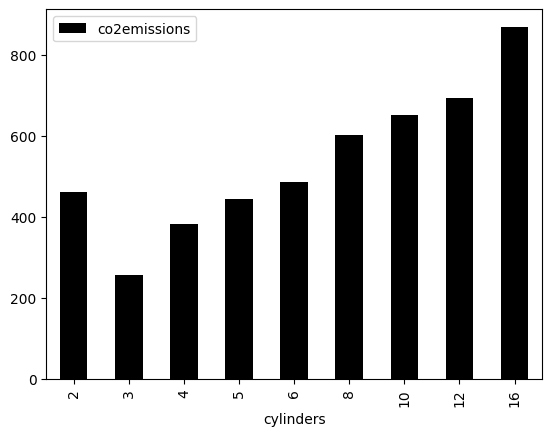

In [12]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
minmax = MinMaxScaler()
x = veichles.groupby('cylinders')['co2emissions'].mean().reset_index()

# x['co2emissions']=minmax.fit_transform(x['co2emissions'].to_frame())
x.plot(kind = 'bar', x = 'cylinders', y = 'co2emissions', color = 'black')
x.describe()

## Preprocessing

<Axes: >

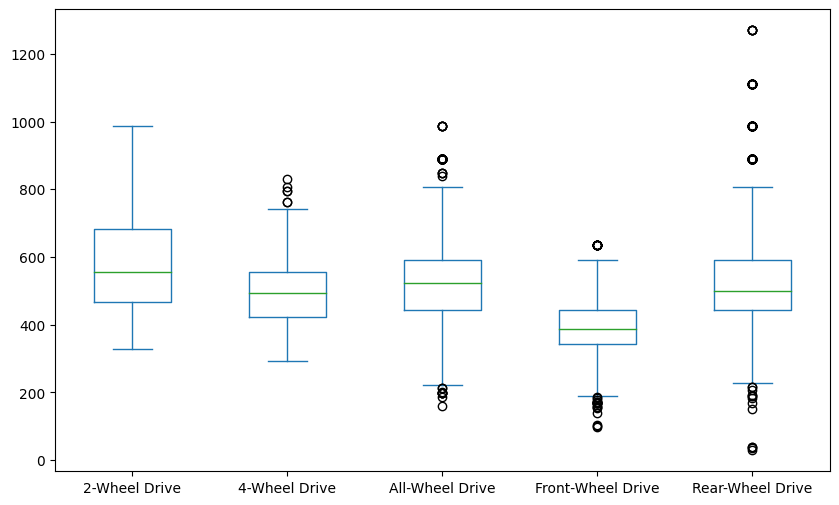

In [13]:
from scipy import stats

le = LabelEncoder()
x = veichles.pivot(columns = 'drive', values = 'co2emissions')
x.plot(kind = 'box', figsize = (10,6))

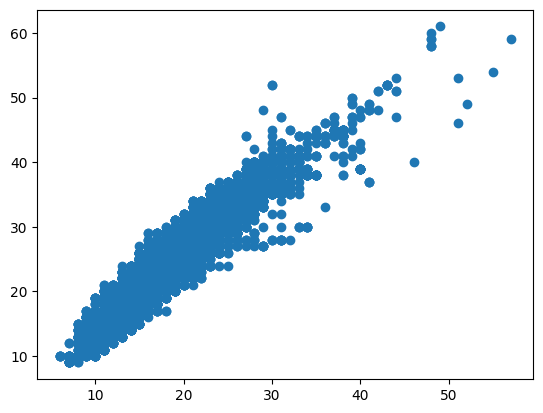

In [14]:
plt.scatter(veichles['citympg'],veichles['highwaympg'])
plt.show()

In [15]:
veichles.isnull().sum()

citympg               6
cylinders             0
displacement          9
drive                 0
highwaympg            8
make                  0
model                 0
class                 0
year                  0
transmissiontype      0
transmissionspeeds    0
co2emissions          0
dtype: int64

In [16]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,StandardScaler
le = LabelEncoder()

# droping columns that dont contribute tthat much to the model according to the above correlation
# veichles.drop({'make','model','transmissionspeeds','year'}, axis = 1, inplace = True)

veichles.loc[:,('year','cylinders','transmissionspeeds','drive','class','transmissiontype')] = (veichles.loc[:,('year','cylinders','transmissionspeeds','drive','class','transmissiontype')].astype('category'))
# veichles.drop(['year','cylinders'], axis = 1)

cat_columns = veichles.loc[:,('year','cylinders','transmissionspeeds','drive','class','transmissiontype')].columns
for x in cat_columns:
    veichles[x] = le.fit_transform(veichles[x])

stdScl = StandardScaler()
veichles.loc[:,(x for x in veichles.columns if veichles[x].dtype != 'object')] = stdScl.fit_transform(veichles.loc[:,(x for x in veichles.columns if veichles[x].dtype != 'object')])


<ipython-input-16-89dfb8dee7a7>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  veichles.loc[:,('year','cylinders','transmissionspeeds','drive','class','transmissiontype')] = (veichles.loc[:,('year','cylinders','transmissionspeeds','drive','class','transmissiontype')].astype('category'))


### Veiw of the correlation to find best feature to use when filling the NA vaues

In [17]:
veichles.corr()


<ipython-input-17-d7e6a595257e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  veichles.corr()


,citympg,cylinders,displacement,drive,highwaympg,class,year,transmissiontype,transmissionspeeds,co2emissions
citympg,1.000000,-0.751562,-0.767136,-0.045820,0.933292,-0.236148,0.156128,0.192430,0.164652,-0.906622
cylinders,-0.751562,1.000000,0.889993,0.093100,-0.669416,0.172826,0.085540,-0.256900,0.080408,0.742596
displacement,-0.767136,0.889993,1.000000,0.085472,-0.718116,0.223105,0.035419,-0.236748,0.004383,0.804248
drive,-0.045820,0.093100,0.085472,1.000000,0.005632,0.044186,-0.087042,0.013317,-0.087288,0.020987
highwaympg,0.933292,-0.669416,-0.718116,0.005632,1.000000,-0.314812,0.264448,0.172542,0.284766,-0.927824
class,-0.236148,0.172826,0.223105,0.044186,-0.314812,1.000000,-0.064370,-0.013372,-0.061139,0.298371
year,0.156128,0.085540,0.035419,-0.087042,0.264448,-0.064370,1.000000,-0.219632,0.711425,-0.224991
transmissiontype,0.192430,-0.256900,-0.236748,0.013317,0.172542,-0.013372,-0.219632,1.000000,0.083414,-0.159268
transmissionspeeds,0.164652,0.080408,0.004383,-0.087288,0.284766,-0.061139,0.711425,0.083414,1.000000,-0.232477
co2emissions,-0.906622,0.742596,0.804248,0.020987,-0.927824,0.298371,-0.224991,-0.159268,-0.232477,1.000000


### Dealing with null values

In [18]:
mask = veichles['citympg'].isnull() & veichles['highwaympg'].isnull()
mask0 = veichles['citympg'].isnull() & veichles['highwaympg'].isnull()

print('Rows with \'NA\' in both \n citympy and highwaympg are:- {}. \n cylinders and displacement are:- {}'.format(mask.sum(), mask0.sum()))

# function to derive values for NA values in the data from features with high correlation
def fillna_value(y):
    x,y = None,None
    
    
    if y == 'citympg':        
        x = veichles['highwaympg'].dropna().to_numpy()
        y = veichles['citympg'].dropna().to_numpy()
        x.resize(y.shape)
        y.resize(y.shape)
                
    elif y == 'highwaympg':      
        x = veichles['citympg'].dropna().to_numpy()
        y = veichles['highwaympg'].dropna().to_numpy()
        x.resize(x.shape)
        y.resize(x.shape)
    else:        
        x = veichles['cylinders'].dropna().to_numpy()
        y = veichles['displacement'].dropna().to_numpy()
        x.resize(y.shape)
        y.resize(y.shape)
    a,b ,c ,d ,e = stats.linregress(x, y)   
    return lambda x : x*a + b


veichles.fillna({'citympg': fillna_value('citympg')(veichles['highwaympg']),
                 'highwaympg': fillna_value('highwaympg')(veichles['citympg']),
                 'displacement': fillna_value('displacement')(veichles['cylinders']),
                }, inplace = True)

veichles.head()

Rows with 'NA' in both 
 citympy and highwaympg are:- 0. 
 cylinders and displacement are:- 0


,citympg,cylinders,displacement,drive,highwaympg,make,model,class,year,transmissiontype,transmissionspeeds,co2emissions
0,-0.789719,0.386147,0.554526,-3.235479,-0.833897,Buick,Electra/Park Avenue,-0.997589,-1.623836,-0.696063,-0.777278,0.669725
1,-0.789719,1.150361,1.216338,-3.235479,-0.659052,Buick,Electra/Park Avenue,-0.997589,-1.623836,-0.696063,-0.777278,0.669725
2,0.104514,1.150361,1.731081,-3.235479,0.390016,Buick,Electra/Park Avenue,-0.997589,-1.623836,-0.696063,-0.777278,0.069711
3,0.775189,0.386147,0.701595,1.072590,1.264239,Cadillac,Fleetwood/DeVille (FWD),-0.997589,-1.623836,-0.696063,-0.777278,-0.444725
4,-0.789719,1.150361,0.554526,1.072590,-0.833897,Cadillac,Brougham/DeVille (RWD),-0.997589,-1.623836,-0.696063,-0.777278,0.669725


### Performing feature reduction with feature the model wont rely on that much

In [19]:
veichles.drop(['model','make','class'], axis = 1 ,inplace = True)
le2 = LabelEncoder()
veichles['co2_range'] = le2.fit_transform(pd.cut(veichles['co2emissions'], bins = [-6.498927e-01,6.697254e-01,6.732510e+0]))
# sns.pairplot(veichles, hue = 'co2_range')

<Axes: xlabel='co2_range'>

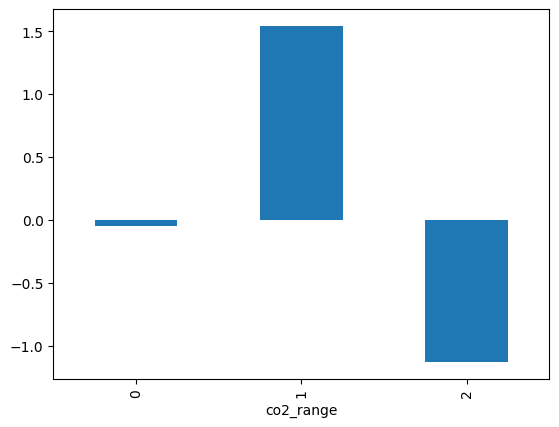

In [20]:
veichles.groupby('co2_range')['co2emissions'].mean().plot(kind = 'bar')

# Working On Models

### Spliting the data

In [21]:
from sklearn.model_selection import train_test_split

X = veichles.iloc[:,:8]
Y = veichles.iloc[:,8:]

x_train,x_test,y_train, y_test = train_test_split(X,Y, random_state = 29, test_size = .25)


## logistic Regressor 

In [22]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, mean_absolute_error
LoR = LogisticRegression(random_state = 1)
LoR.fit(x_train,y_train['co2_range'])

LogisticRegression(random_state=1)

In [23]:
y_pred = LoR.predict(x_test)
print('Model accuracy_score : ', accuracy_score(y_test['co2_range'],y_pred)*100)
print('Model mean_squared_error : ', mean_squared_error(y_test['co2_range'],y_pred)*100)
print('Model mean_absolute_error: ', mean_absolute_error(y_test['co2_range'],y_pred)*100)


Model accuracy_score :  96.64683612763656
Model mean_squared_error :  6.500811249323959
Model mean_absolute_error:  4.402379664683613


In [24]:
classification_report(y_test['co2_range'],y_pred)

'              precision    recall  f1-score   support\n\n           0       0.97      0.97      0.97      5078\n           1       0.95      0.94      0.94      1837\n           2       0.98      0.98      0.98      2330\n\n    accuracy                           0.97      9245\n   macro avg       0.96      0.96      0.96      9245\nweighted avg       0.97      0.97      0.97      9245\n'

## Linear Regressor

In [25]:
LiR = LinearRegression()
LiR.fit(x_train.drop(['transmissiontype','year'], axis = 1),y_train['co2emissions'])
# rom sklearn.linear_model import LinearRegression
# reg = LinearRegression()
# parameters = {"alpha": [1, 10, 100, 290, 500], "fit_intercept": [True, False], "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'], }
# grid = GridSearchCV(estimator=reg, param_grid = parameters, cv = 2, n_jobs=-1)
# grid.fit(x_train, y_train)
# reg.score(x_test ...

LinearRegression()

In [26]:
y_pred = LiR.predict(x_test.drop(['transmissiontype','year'], axis = 1))

print('model Mean_absolute_error : ', mean_absolute_error(y_test['co2emissions'] , y_pred))
print('model Mean_squared_error : ', mean_squared_error(y_test['co2emissions'] , y_pred))
print('model R2_score : ', LiR.score(x_test.drop(['transmissiontype','year'], axis = 1), y_test['co2emissions'].to_numpy()))

# plt.scatter(y_test['co2emissions'],y_pred)
# plt.title('Y-predict Vs y-actual')
# plt.xlabel('co2emissions')
# plt.ylabel('predicted emmisions')

model Mean_absolute_error :  0.2041343819963567
model Mean_squared_error :  0.09654732236693382
model R2_score :  0.9034927731081644


# N.B
### linear  and logistic models are provded as aready well turned models 
##### Furter turning of features only reduces model  performence 

## Decision Tree Usage

#### Turning the Criterion Feature

In [27]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
criterion = ['gini', 'entropy', 'log_loss']
criterion1 = []
clf = DecisionTreeClassifier()

for x in criterion:
    clf = DecisionTreeClassifier( criterion = x )
    clf.fit(x_train, y_train['co2_range'])
    y_pred = clf.predict(x_test)
    criterion1.append(accuracy_score(y_pred,y_test['co2_range']))
criterion1

[0.9847485127095728, 0.9856138453217955, 0.9856138453217955]

### Fine Turning the Max_Depth paramerter

In [28]:
clr = DecisionTreeRegressor()
score = []
depths = pd.DataFrame(range(7,52),columns = ['Max_depth'])

for x in depths.values:
    clr = DecisionTreeRegressor(max_depth = int(x))
    clr.fit(x_train, y_train['co2emissions'])
    y_pred = clf.predict(x_test)
    score.append(clr.score(x_test, y_test['co2emissions']))
    
depths['Model_score'] = np.asarray(score).reshape(-1,1)


<Axes: title={'center': 'Line graph showing model perfomences with depth'}, xlabel='Max_depth'>

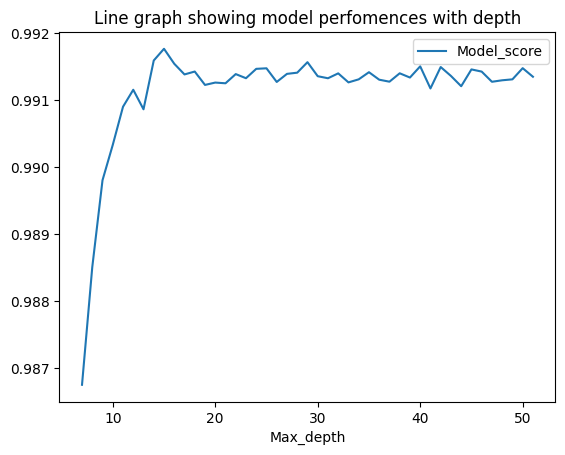

In [29]:
depths.plot(kind = 'line' ,x = 'Max_depth', y = 'Model_score',title = "Line graph showing model perfomences with depth")

## Random forest regressor

In [30]:
from sklearn.ensemble import RandomForestRegressor
# rfr = RandomForestRegressor(criterion  ='entropy', max_leaf )
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train['co2emissions'])
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [31]:
from sklearn.metrics import r2_score
y_pred = rfr.predict(x_test)

### Random Forest model metrix using defualt parameters

In [32]:
print('Data_stdeviation and Mean;', y_test['co2emissions'].std(), y_test['co2emissions'].mean() )
print('Predict_stdeviation and Mean ',y_pred.std() , y_pred.mean())
print('model\'s R2_score: ', r2_score(y_test['co2emissions'],y_pred))


Data_stdeviation and Mean; 1.0002618103572678 -0.00784924263024403
Predict_stdeviation and Mean  0.9970335002416393 -0.007454987840760684
model's R2_score:  0.992961680932724


### Using GridSearchCV Search basing on to  fine tune parameters
                                                                                            21/U/08812/EVE

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [80, 170, 300],
    'max_depth': [2, 3 , 7],
    'min_samples_split': [3, 4, 7],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2']
}

gs_cv = GridSearchCV(estimator=rfr, param_grid=param_grid,
                     cv=3, n_jobs=-1)


In [34]:
gs_cv.fit(x_train, y_train['co2emissions'])


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=3,
             param_grid={'max_depth': [2, 3, 7],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [3, 4, 7],
                         'n_estimators': [80, 170, 300]})

In [35]:
print('best_params:',gs_cv.best_params_)

best_params: {'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 170}


In [36]:
rfr.set_params(**gs_cv.best_params_)
rfr.fit(x_train,y_train['co2emissions'])
new_y_pred = rfr.predict(x_test)

print('Previous_std_value and Mean;', y_pred.std() , y_pred.mean() )
print('New_std_value and Mean ',new_y_pred.std() , new_y_pred.mean())
print('New_model\'s R2_score: ', r2_score(y_test['co2emissions'],new_y_pred))



Previous_std_value and Mean; 0.9970335002416393 -0.007454987840760684
New_std_value and Mean  0.9736278940544489 -0.006012116482553421
New_model's R2_score:  0.9862013506217382


## K-means clustering

## Parameter hyper turning
                                                                                            21/U/08812/EVE

In [37]:
from sklearn.cluster import KMeans
kmeans = KMeans()
param_grid = {
    'n_clusters': [2, 3, 4, 5],
    'init': ['k-means++', 'random'],
    'n_init': [10, 20, 30],
    'max_iter': [130, 300,420]
         }
gs_cv0 = GridSearchCV(estimator=kmeans, param_grid=param_grid,
                     cv=3, n_jobs=-1)
X = x_train.loc[:, ['year','highwaympg']]
gs_cv0.fit(X)
best_params = gs_cv.best_params_
print('the best parameters:', best_params)

the best parameters: {'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 170}


In [38]:
kmeans.set_params(**gs_cv0.best_params_)
kmeans.fit(X)

KMeans(init='random', max_iter=130, n_clusters=5, n_init=30)

<Axes: xlabel='highwaympg', ylabel='year'>

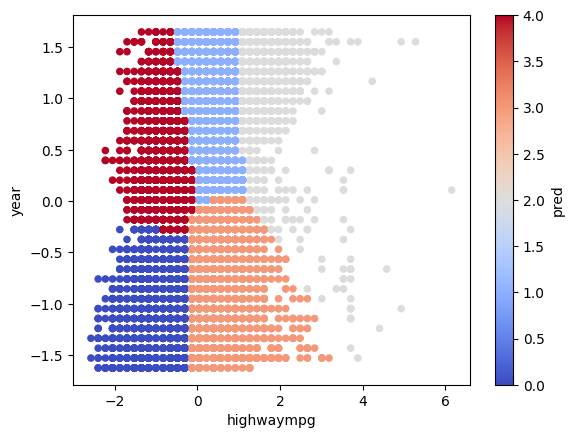

In [49]:
X_test = x_test.loc[:, ['year','highwaympg']]
X_test['pred'] = kmeans.predict(x_test.loc[:, ['year','highwaympg']])

X_test.plot(kind = 'scatter', x = 'highwaympg',y ='year', c='pred',cmap='coolwarm')


# Best performing model
### Random forest classifier

In [45]:
print('Model_std_value and Mean ',new_y_pred.std() , new_y_pred.mean())
print('Model_model\'s R2_score: ', r2_score(y_test['co2emissions'],new_y_pred))
print('MSE', mean_squared_error(y_test['co2emissions'],new_y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test['co2emissions'],new_y_pred)))




Model_std_value and Mean  0.9736278940544489 -0.006012116482553421
Model_model's R2_score:  0.9862013506217382
MSE 0.013804382248434898
RMSE 0.11749205185217806


# Model_model's R2_score:  0.9862013506217382
